# Machine Learning Lab 04: Multinomial Logistic Regression


#### Name: Pranisaa Charnparttaravanit
#### ID: st121720

### Import libraries

In [14]:
import numpy as np
import pandas as pd 
import random
import math

### Functions

In [15]:
def phi(i, theta, X):
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta,mat_x.T)) #e^theataj * x
    den = 0
    for j in range(0,k):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j,mat_x.T))
    phi_i = num/den
    return phi_i

In [16]:
def indicator(i, j):
    if i == j: return 1 #correct class, return 1 else return 0
    else: return 0

def grad_cost(X, y, j, theta):
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y.iloc[i], j) - phi(j, theta,X.iloc[i])
        sum = sum + (X.iloc[i] * p)
    grad = -sum/m
    return grad

def gradient_descent(X1,y1,X2,y2, theta, alpha, iters):
    costs_train = []
    costs_test = []
    for iter in range(iters):
        for j in range(0, k):
            theta[j] = theta[j] - alpha * grad_cost(X1, y1, j, theta)
        cost_val_train = cost(X1,y1,theta)
        cost_val_test = cost(X2,y2,theta)
        costs_train.append(cost_val_train)
        costs_test.append(cost_val_test)
    return theta,costs_train,costs_test

def cost(X,y,theta):
    m,n = X.shape
    k= len(set(y))
    sum_cost = 0
    for i in range(0,m):
        for j in range(0,k):
            cost = indicator(y[i],j)*np.log(phi(j,theta,X.iloc[i]))
            sum_cost += cost
    return sum_cost/(-m)
            
def h(X, theta):
    X = np.matrix(X)
    h_matrix = np.empty((k,1))
    den = 0
    for j in range(0,k):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,k):
        h_matrix[i] = math.exp(np.dot(theta[i],X.T))
    h_matrix = h_matrix/den
    return h_matrix

### Importing data

In [17]:
data = pd.read_csv('Iris.csv')
print(data.head())

data = data.drop(['Id'],axis=1)
print(data.head())


# extract y from data
y_label = 'Species';

y =data[y_label];
# print(y)

y_index = data.columns.get_loc(y_label)
# extract features from data
X = data.iloc[:,:y_index]
# print(X)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


### Partitioning the data

In [18]:
m, n = X.shape
idx = np.arange(0,m)

# Partion data into training and testing dataset
# random.seed(97)
random.shuffle(idx)
data = data.iloc[idx,:]
data = data.reset_index()
data = data.drop(['index'],axis=1)
percent_train = 0.7
m_train = int(m*percent_train)

X_train = data.iloc[0:m_train,0:y_index];
X_test = data.iloc[m_train:,0:y_index];

y_train = data.iloc[:m_train,y_index];
y_test = data.iloc[m_train:,y_index];
labels = pd.unique(data[y_label])
print(labels)

# Encode target labels as integers 0..k-1

i = 0
for label in y.unique():
    y_train[y_train.str.match(label)] = str(i)
    y_test[y_test.str.match(label)] = str(i)
    i = i + 1      
y_train = y_train.astype(int)
y_test = np.array(y_test)
y_test = y_test.astype(int)

# print(y_train)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica']


### Adding dummy

In [19]:
# k is the number of unique labels

k = len(set(y))

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)
    

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)


### Initializing data and calculating costs

In [20]:
# Reset m and n for training data

m, n = X_train.shape

# Initialize theta for each class  

theta_initial = np.ones((k,n))

alpha = .05
iterations = 200

# Logistic regression

theta,costs_train, costs_test = gradient_descent(X_train,y_train,X_test,y_test, theta_initial, alpha, iterations)

print(theta)
# print(costs_train)
# print(costs_test)

[[ 1.17401526  1.3463927   1.82227719 -0.19631607  0.4581865 ]
 [ 1.09312     1.18891461  0.75947078  1.19298451  0.82272405]
 [ 0.74202258  0.51356959  0.4486984   2.02313076  1.72382293]]


### Accuracy calculation

In [21]:
# Predicting classes on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data

m,n = X_test.shape

y_pred = []
for index,row in X_test.iterrows():
    h_matrix = h(row, theta)
    prediction = int(np.where(h_matrix == h_matrix.max())[0])
    y_pred.append(prediction)
        
# Estimate accuracy of model on test data        
correct = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct += +1
# print(correct)

accuracy = correct/m
print('Accuracy: %.4f' % accuracy)


# correct = (y_pred == y_test).value_counts()[True]
# accuracy = correct/m
# print('Accuracy: %.4f' % accuracy)


Accuracy: 1.0000


# On your own in lab

Do the following in lab:
1. Write a function to obtain the cost for particular $\mathbb{X}, \mathbf{y}, and \theta$.
2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.


#### 1. Write a function to obtain the cost for particular $\mathbb{X}, \mathbf{y}, and \theta$.

The answer is already included above under "def gradient_descent"

#### 2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.

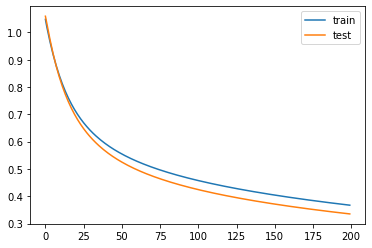

In [22]:
import matplotlib.pyplot as plt
plt.plot(costs_train, label = 'train')
plt.plot(costs_test, label = 'test')
plt.legend()

#### 3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.

In [23]:
def idx(y_pred,y_test,klass):
    idx_klass_pred =[]
    idx_klass_test = []
    for i in range(len(y_pred)):
        if y_pred[i] == klass:
            idx_klass_pred.append(i)
    for j in range(len(y_test)):
        if y_test[j] == klass:
            idx_klass_test.append(j)
    return idx_klass_pred , idx_klass_test

idx_0_pred, idx_0_test = idx(y_pred,y_test,0)
idx_1_pred, idx_1_test = idx(y_pred,y_test,1)
idx_2_pred, idx_2_test = idx(y_pred,y_test,2)
# print(y_test)

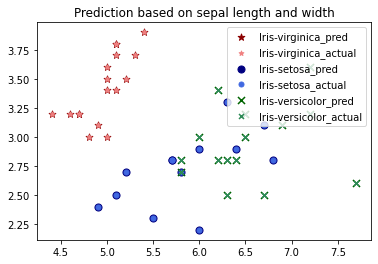

In [24]:
plt.scatter(X_test['SepalLengthCm'].iloc[idx_0_pred],X_test['SepalWidthCm'].iloc[idx_0_pred],s=50, c='darkred', marker='*', label='Iris-virginica_pred')
plt.scatter(X_test['SepalLengthCm'].iloc[idx_0_test],X_test['SepalWidthCm'].iloc[idx_0_test],s=25, c='lightcoral', marker='*', label='Iris-virginica_actual')
plt.scatter(X_test['SepalLengthCm'].iloc[idx_1_pred],X_test['SepalWidthCm'].iloc[idx_1_pred],s=50, c='navy', marker='o', label='Iris-setosa_pred')
plt.scatter(X_test['SepalLengthCm'].iloc[idx_1_test],X_test['SepalWidthCm'].iloc[idx_1_test],s=25, c='royalblue', marker='o', label='Iris-setosa_actual')
plt.scatter(X_test['SepalLengthCm'].iloc[idx_2_pred],X_test['SepalWidthCm'].iloc[idx_2_pred],s=50, c='darkgreen', marker='x', label='Iris-versicolor_pred')
plt.scatter(X_test['SepalLengthCm'].iloc[idx_2_test],X_test['SepalWidthCm'].iloc[idx_2_test],s=25, c='seagreen', marker='x', label='Iris-versicolor_actual')
plt.title("Prediction based on sepal length and width")
plt.legend()

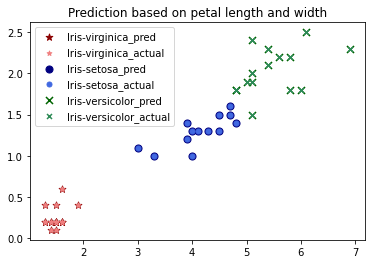

In [25]:
plt.scatter(X_test['PetalLengthCm'].iloc[idx_0_pred],X_test['PetalWidthCm'].iloc[idx_0_pred],s=50, c='darkred', marker='*', label='Iris-virginica_pred')
plt.scatter(X_test['PetalLengthCm'].iloc[idx_0_test],X_test['PetalWidthCm'].iloc[idx_0_test],s=25, c='lightcoral', marker='*', label='Iris-virginica_actual')
plt.scatter(X_test['PetalLengthCm'].iloc[idx_1_pred],X_test['PetalWidthCm'].iloc[idx_1_pred],s=50, c='navy', marker='o', label='Iris-setosa_pred')
plt.scatter(X_test['PetalLengthCm'].iloc[idx_1_test],X_test['PetalWidthCm'].iloc[idx_1_test],s=25, c='royalblue', marker='o', label='Iris-setosa_actual')
plt.scatter(X_test['PetalLengthCm'].iloc[idx_2_pred],X_test['PetalWidthCm'].iloc[idx_2_pred],s=50, c='darkgreen', marker='x', label='Iris-versicolor_pred')
plt.scatter(X_test['PetalLengthCm'].iloc[idx_2_test],X_test['PetalWidthCm'].iloc[idx_2_test],s=25, c='seagreen', marker='x', label='Iris-versicolor_actual')
plt.title("Prediction based on petal length and width")
plt.legend()